In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pwd

/leap


In [3]:
ds_in = xr.open_dataset('/leap/DB_scratch/physicsnemo/research/corrdiff_27_Nov/results_nyc_2/output/corrdiff_output.nc', group='input')
ds_true = xr.open_dataset('/leap/DB_scratch/physicsnemo/research/corrdiff_27_Nov/results_nyc_2/output/corrdiff_output.nc', group='truth')
ds_pred = xr.open_dataset('/leap/DB_scratch/physicsnemo/research/corrdiff_27_Nov/results_nyc_2/output/corrdiff_output.nc', group='prediction')

In [4]:
ds_in

<xarray.Dataset> Size: 5MB
Dimensions:                    (time: 6, y: 128, x: 128)
Dimensions without coordinates: time, y, x
Data variables: (12/13)
    10m_u_component_of_wind    (time, y, x) float32 393kB ...
    10m_v_component_of_wind    (time, y, x) float32 393kB ...
    2m_temperature             (time, y, x) float32 393kB ...
    geopotential_500           (time, y, x) float32 393kB ...
    geopotential_850           (time, y, x) float32 393kB ...
    temperature_500            (time, y, x) float32 393kB ...
    ...                         ...
    total_column_water_vapour  (time, y, x) float32 393kB ...
    total_precipitation        (time, y, x) float32 393kB ...
    u_component_of_wind_500    (time, y, x) float32 393kB ...
    u_component_of_wind_850    (time, y, x) float32 393kB ...
    v_component_of_wind_500    (time, y, x) float32 393kB ...
    v_component_of_wind_850    (time, y, x) float32 393kB ...

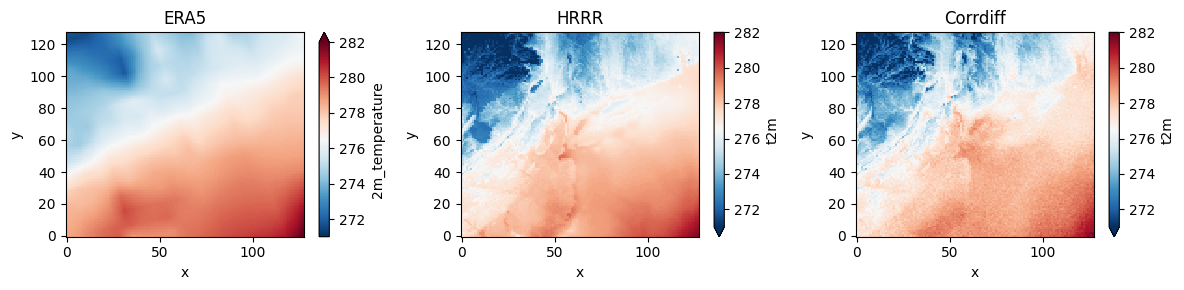

In [5]:
plt.figure(figsize=(12, 3))

vmin = 271
vmax=282

plt.subplot(131)
ds_in['2m_temperature'].isel(time=0).plot(vmin=vmin, vmax=vmax, cmap='RdBu_r')
plt.title('ERA5')

plt.subplot(132)
ds_true['t2m'].isel(time=0).plot(vmin=vmin, vmax=vmax, cmap='RdBu_r')
plt.title('HRRR')

plt.subplot(133)
ds_pred['t2m'].isel(time=0, ensemble=0).plot(vmin=vmin, vmax=vmax, cmap='RdBu_r')
plt.title('Corrdiff')

plt.tight_layout()

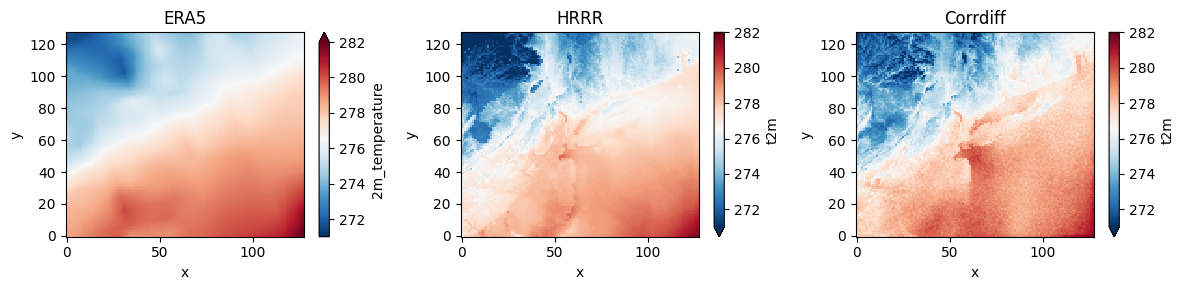

In [6]:
plt.figure(figsize=(12, 3))

vmin = 271
vmax=282

plt.subplot(131)
ds_in['2m_temperature'].isel(time=0).plot(vmin=vmin, vmax=vmax, cmap='RdBu_r')
plt.title('ERA5')

plt.subplot(132)
ds_true['t2m'].isel(time=0).plot(vmin=vmin, vmax=vmax, cmap='RdBu_r')
plt.title('HRRR')

plt.subplot(133)
ds_pred['t2m'].isel(time=0, ensemble=0).plot(vmin=vmin, vmax=vmax, cmap='RdBu_r')
plt.title('Corrdiff')

plt.tight_layout()

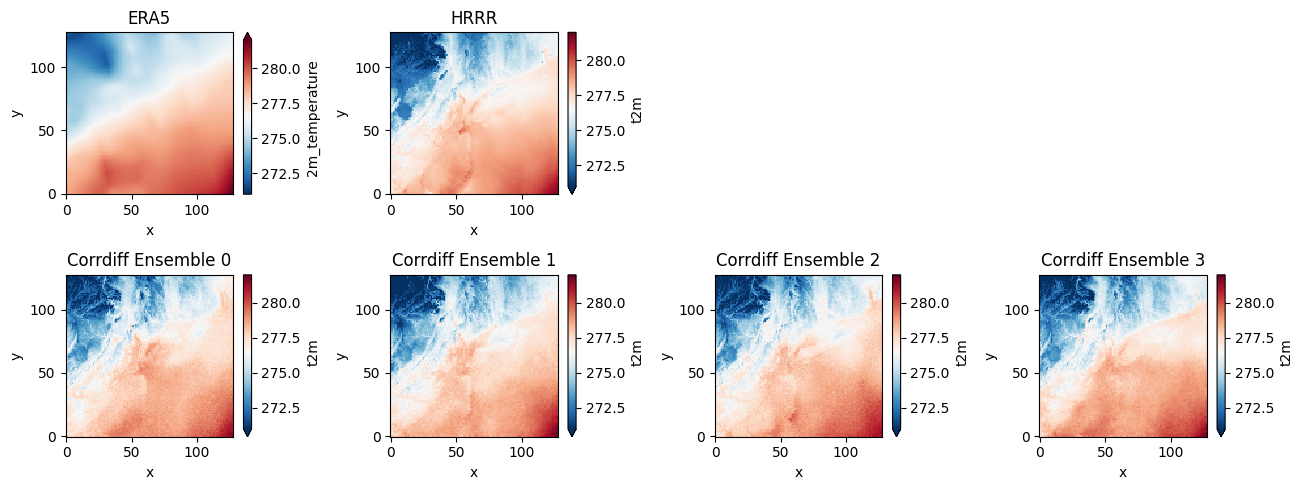

In [5]:
plt.figure(figsize=(13, 5))

vmin = 271
vmax=282

plt.subplot(241)
ds_in['2m_temperature'].isel(time=0).plot(vmin=vmin, vmax=vmax, cmap='RdBu_r')
plt.title('ERA5')

plt.subplot(242)
ds_true['t2m'].isel(time=0).plot(vmin=vmin, vmax=vmax, cmap='RdBu_r')
plt.title('HRRR')

for i in range(4):
    plt.subplot(245 + i)
    ds_pred['t2m'].isel(time=0, ensemble=i).plot(vmin=vmin, vmax=vmax, cmap='RdBu_r')
    plt.title(f'Corrdiff Ensemble {i}')

plt.tight_layout()

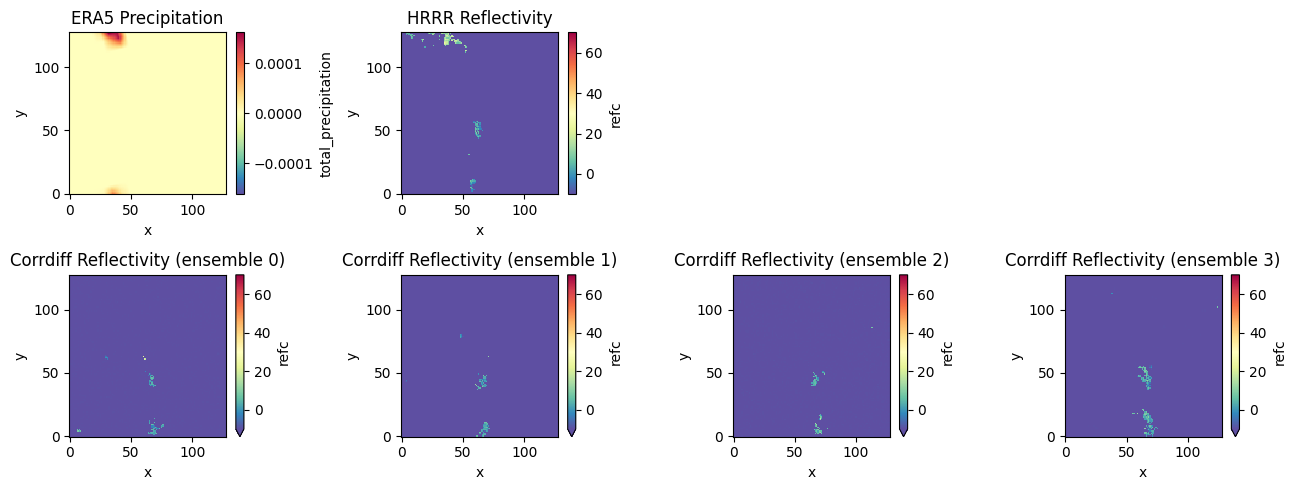

In [23]:
plt.figure(figsize=(13, 5))

id_t = 5

plt.subplot(241)
ds_in['total_precipitation'].isel(time=id_t).plot(cmap='Spectral_r')
plt.title('ERA5 Precipitation')

plt.subplot(242)
ds_true['refc'].isel(time=id_t).plot(cmap='Spectral_r', vmin=-10, vmax=70)
plt.title('HRRR Reflectivity')

for i in range(4):
    plt.subplot(245 + i)
    ds_pred['refc'].isel(time=id_t, ensemble=i).plot(cmap='Spectral_r', vmin=-10, vmax=70)
    plt.title('Corrdiff Reflectivity (ensemble {})'.format(i))

plt.tight_layout()

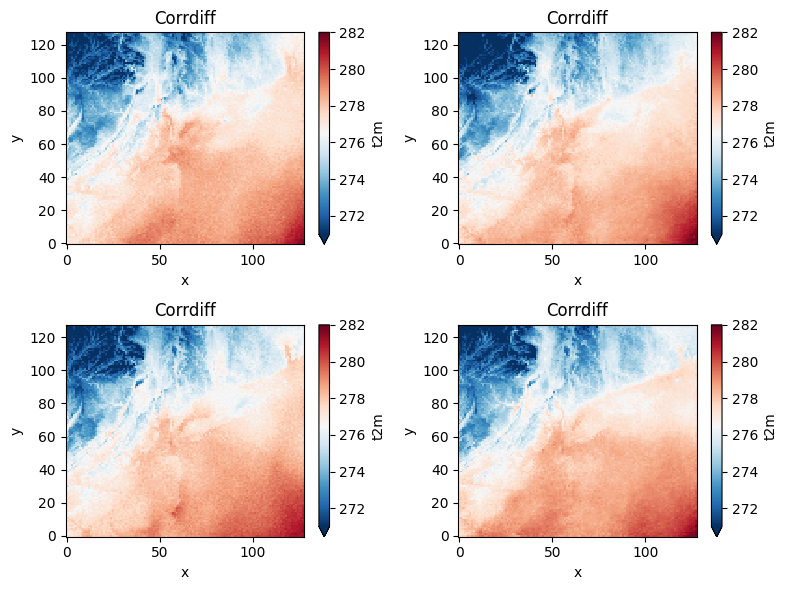

In [7]:
plt.figure(figsize=(8, 6))

vmin = 271
vmax=282

for i in range(4):
    
    plt.subplot(221+i)
    
    ds_pred['t2m'].isel(time=0, ensemble=i).plot(vmin=vmin, vmax=vmax, cmap='RdBu_r')
    plt.title('Corrdiff')

plt.tight_layout()

Text(0.5, 1.0, 'Temperature along latitude y=20')

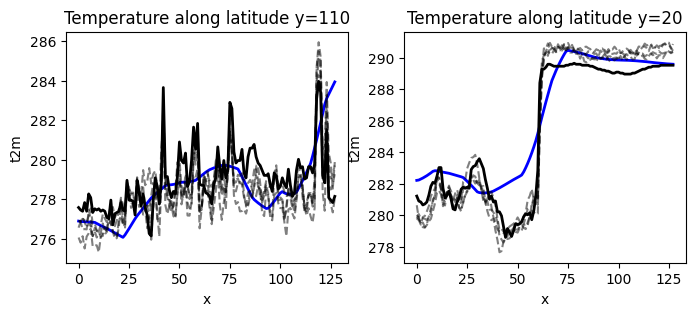

In [16]:
plt.figure(figsize=(8, 3))

id_t = -3

plt.subplot(121)
idy = 110
ds_in['2m_temperature'].isel(time=id_t, y=idy).plot(color='b', linewidth=2)
ds_true['t2m'].isel(time=id_t, y=idy).plot(color='k', linewidth=2)
for i in range(4):
    ds_pred['t2m'].isel(time=id_t, y=idy, ensemble=i).plot(linestyle='dashed', color='k', alpha=0.5)
plt.title('Temperature along latitude y={}'.format(idy))

plt.subplot(122)
idy = 20
ds_in['2m_temperature'].isel(time=id_t, y=idy).plot(color='b', linewidth=2)
ds_true['t2m'].isel(time=id_t, y=idy).plot(color='k', linewidth=2)
for i in range(4):
    ds_pred['t2m'].isel(time=id_t, y=idy, ensemble=i).plot(linestyle='dashed', color='k', alpha=0.5)
plt.title('Temperature along latitude y={}'.format(idy))

In [5]:
!pip install -q xrft 
!pip install -q numpy_groupies

In [6]:
import xrft

In [15]:
ps_in = xrft.isotropic_power_spectrum(ds_in['2m_temperature'], dim=['x', 'y'], detrend='linear', truncate=True)
ps_true = xrft.isotropic_power_spectrum(ds_true['t2m'], dim=['x', 'y'], detrend='linear', truncate=True)
ps_pred = xrft.isotropic_power_spectrum(ds_pred['t2m'], dim=['x', 'y'], detrend='linear', truncate=True)

Text(0.5, 1.0, 'Isotropic Power Spectrum of 2m Temperature')

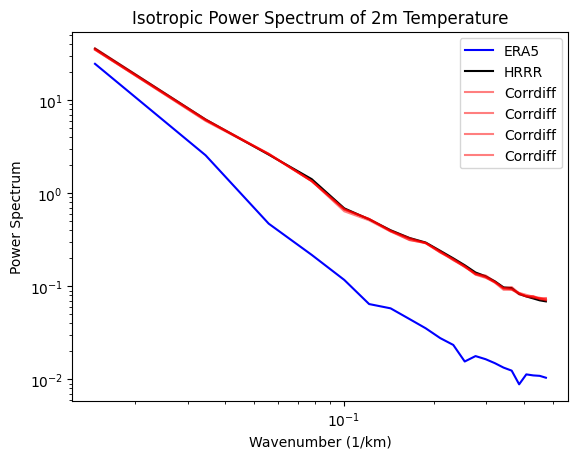

In [16]:
ps_in.mean('time').plot(label='ERA5', color='b')
ps_true.mean('time').plot(label='HRRR', color='k')
for i in range(4):
    ps_pred.isel(ensemble=i).mean('time').plot(label='Corrdiff', color='r', alpha=0.5)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Wavenumber (1/km)')
plt.ylabel('Power Spectrum')
plt.legend()
plt.title('Isotropic Power Spectrum of 2m Temperature')
#plt.ylim(1e-2, 10)

In [17]:
ps_in = xrft.isotropic_power_spectrum(ds_in['10m_u_component_of_wind'], dim=['x', 'y'], detrend='linear', truncate=True)
ps_true = xrft.isotropic_power_spectrum(ds_true['u10'], dim=['x', 'y'], detrend='linear', truncate=True)
ps_pred = xrft.isotropic_power_spectrum(ds_pred['u10'], dim=['x', 'y'], detrend='linear', truncate=True)

Text(0.5, 1.0, 'Isotropic Power Spectrum of 10m U Wind Component')

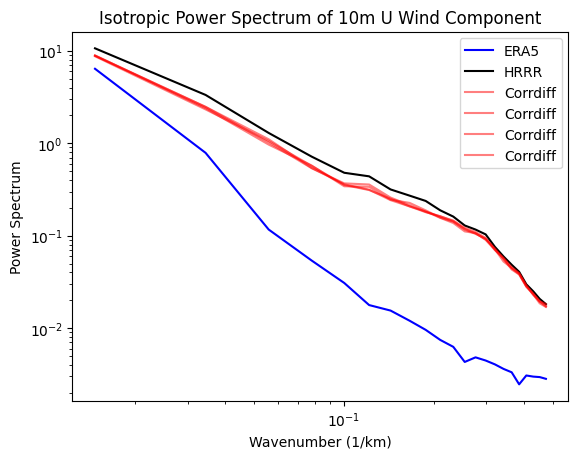

In [18]:
ps_in.mean('time').plot(label='ERA5', color='b')
ps_true.mean('time').plot(label='HRRR', color='k')
for i in range(4):
    ps_pred.isel(ensemble=i).mean('time').plot(label='Corrdiff', color='r', alpha=0.5)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Wavenumber (1/km)')
plt.ylabel('Power Spectrum')
plt.legend()
plt.title('Isotropic Power Spectrum of 10m U Wind Component')
#plt.ylim(1e-2, 10)